In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame({
    "hours"  : np.random.randint(1, 8, 50),
    "scores" : np.random.randint(50, 100, 50) 
})

df.head()

,hours,scores
0,6,69
1,5,78
2,3,84
3,3,90
4,5,59


In [4]:
df.describe()

,hours,scores
count,50.000000,50.00000
mean,4.800000,74.52000
std,1.653691,13.45778
min,1.000000,52.00000
25%,3.000000,65.00000
50%,5.000000,74.00000
75%,6.000000,85.50000
max,7.000000,99.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hours   50 non-null     int32
 1   scores  50 non-null     int32
dtypes: int32(2)
memory usage: 532.0 bytes


In [6]:
df.isna().sum()

hours     0
scores    0
dtype: int64

Text(0, 0.5, 'scores')

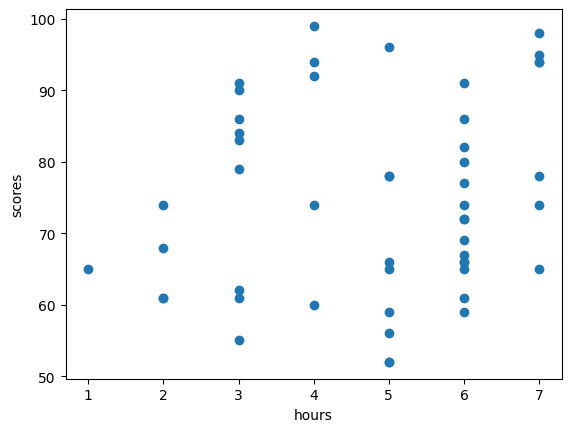

In [8]:
plt.scatter(x="hours", y="scores", data=df)
plt.xlabel("hours")
plt.ylabel("scores")

(array([4., 7., 8., 3., 6., 6., 3., 2., 7., 4.]),
 array([52. , 56.7, 61.4, 66.1, 70.8, 75.5, 80.2, 84.9, 89.6, 94.3, 99. ]),
 <BarContainer object of 10 artists>)

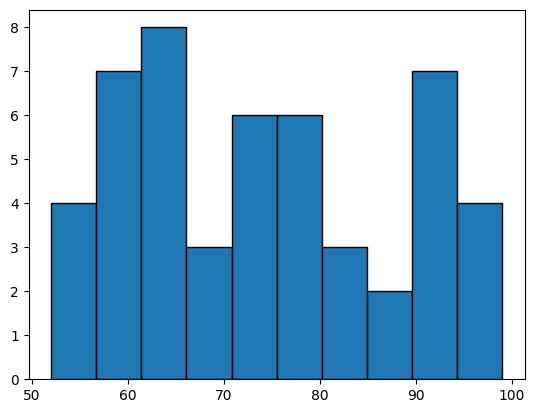

In [10]:
plt.hist(df.scores, edgecolor="black")

In [35]:
# data prep

X = df[["hours"]]  # independent var
y = df.scores # dependent var

print(X.head(), end="\n\n")
print(y.head(), end="\n\n")

   hours
0      6
1      5
2      3
3      3
4      5

0    69
1    78
2    84
3    90
4    59
Name: scores, dtype: int32



In [36]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.head(), end="\n\n")
print(X_test.head(), end="\n\n")
print(y_train.head(), end="\n\n")
print(y_test.head(), end="\n\n")


    hours
6       6
41      5
46      7
47      3
15      3

    hours
13      6
39      2
30      5
45      4
17      6

6     72
41    66
46    94
47    86
15    83
Name: scores, dtype: int32

13    72
39    61
30    96
45    60
17    61
Name: scores, dtype: int32



In [38]:
# scaling data --> standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5], end="\n\n")
print(X_test_scaled[:5], end="\n\n")

[[ 0.6862673 ]
 [ 0.12767764]
 [ 1.24485697]
 [-0.98950169]
 [-0.98950169]]

[[ 0.6862673 ]
 [-1.54809136]
 [ 0.12767764]
 [-0.43091203]
 [ 0.6862673 ]]



In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
print(model.coef_, end="\n\n")
print(model.intercept_, end="\n\n")

[2.89098651]

75.14285714285714



In [45]:
y_preds = model.predict(X_test_scaled)
y_preds[:5]

array([77.12684666, 70.6673459 , 75.51197147, 73.89709628, 77.12684666])

In [46]:
y_test[:5]

13    72
39    61
30    96
45    60
17    61
Name: scores, dtype: int32

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse= mean_squared_error(y_test, y_pred=y_preds)
print(mse, end="\n\n")

r2 = r2_score(y_test, y_preds)
print(r2)

201.11273790112838

-0.0500386603182319


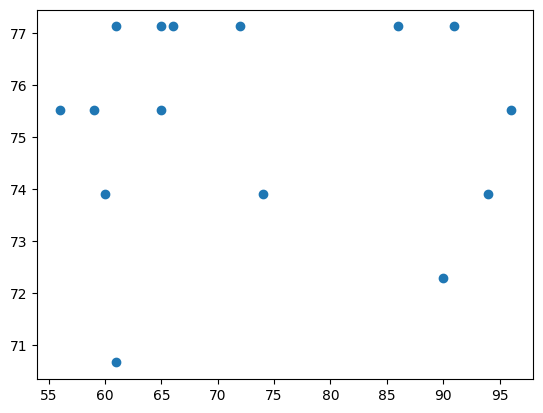

In [47]:
plt.scatter(y_test, y_preds)